# Final Task Kalbe Nutritionals

## Data Understanding

### Import & Merge Data

In [755]:
import pandas as pd
import numpy as np 
import warnings
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

df_customer = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Customer.csv', sep=';')
df_product = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Product.csv', sep=';')
df_store = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Store.csv', sep=';')
df_transaction = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Transaction.csv', sep=';')

In [756]:
# Melakukan operasi join antara tabel-tabel
df = pd.merge(df_transaction, df_product, on='ProductID')
df = pd.merge(df, df_store, on='StoreID')
df = pd.merge(df, df_customer, on='CustomerID')

## Pre-Exploratory Data Analysis (EDA)

In [757]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Product Name    5020 non-null   object
 9   Price_y         5020 non-null   int64 
 10  StoreName       5020 non-null   object
 11  GroupStore      5020 non-null   object
 12  Type            5020 non-null   object
 13  Latitude        5020 non-null   object
 14  Longitude       5020 non-null   object
 15  Age             5020 non-null   int64 
 16  Gender          5020 non-null   int64 
 17  Marital Status  4976 non-null   object
 18  Income  

In [759]:
# df[df['Price_x'].values == df['Price_y'].values]
df.drop(columns=['Price_y'], inplace=True)
df.rename(columns={'Price_x' : 'Price'}, inplace=True)

In [760]:
df[df.duplicated()]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income


In [761]:
for i in df.columns :
    print(f"~ ~ ~ {i} || Type : {df[i].dtypes} ~ ~ ~")
    print(f"{df[i].unique().tolist()[:5]} \n")

~ ~ ~ TransactionID || Type : object ~ ~ ~
['TR11369', 'TR56601', 'TR89012', 'TR67395', 'TR45738'] 

~ ~ ~ CustomerID || Type : int64 ~ ~ ~
[328, 117, 335, 181, 154] 

~ ~ ~ Date || Type : object ~ ~ ~
['01/01/2022', '24/12/2022', '25/03/2022', '22/01/2022', '29/12/2022'] 

~ ~ ~ ProductID || Type : object ~ ~ ~
['P3', 'P9', 'P5', 'P8', 'P2'] 

~ ~ ~ Price || Type : int64 ~ ~ ~
[7500, 10000, 4200, 16000, 3200] 

~ ~ ~ Qty || Type : int64 ~ ~ ~
[4, 1, 5, 3, 6] 

~ ~ ~ TotalAmount || Type : int64 ~ ~ ~
[30000, 10000, 21000, 48000, 9600] 

~ ~ ~ StoreID || Type : int64 ~ ~ ~
[12, 9, 6, 11, 5] 

~ ~ ~ Product Name || Type : object ~ ~ ~
['Crackers', 'Yoghurt', 'Thai Tea', 'Oat', 'Ginger Candy '] 

~ ~ ~ StoreName || Type : object ~ ~ ~
['Prestasi Utama', 'Lingga', 'Sinar Harapan', 'Bonafid', 'Prima Tendean'] 

~ ~ ~ GroupStore || Type : object ~ ~ ~
['Prestasi', 'Lingga', 'Gita', 'Prima', 'Buana'] 

~ ~ ~ Type || Type : object ~ ~ ~
['General Trade', 'Modern Trade'] 

~ ~ ~ Latitude || Typ

In [762]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price              0
Qty                0
TotalAmount        0
StoreID            0
Product Name       0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Age                0
Gender             0
Marital Status    44
Income             0
dtype: int64

In [763]:
df['Latitude'] = df['Latitude'].str.replace(',', '.')
df['Latitude'] = df['Latitude'].astype(float)

df['Longitude'] = df['Longitude'].str.replace(',', '.')
df['Longitude'] = df['Longitude'].astype(float)

df['Income'] = df['Income'].str.replace(',', '.')
df['Income'] = df['Income'].astype(float)

In [764]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID,Latitude,Longitude,Age,Gender,Income
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,-2.942236,109.600789,40.003586,0.452988,8.623713
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,4.323225,8.357593,12.834719,0.497835,6.518242
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,-7.797068,95.323753,0.000000,0.000000,0.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,-6.914864,104.756554,30.000000,0.000000,4.220000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,-5.135399,110.370529,39.000000,0.000000,7.720000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,0.533505,114.590111,51.000000,1.000000,10.780000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,5.548290,128.190643,72.000000,1.000000,71.300000


In [765]:
df.nunique()

TransactionID     4908
CustomerID         447
Date               365
ProductID           10
Price               10
Qty                 10
TotalAmount         44
StoreID             14
Product Name        10
StoreName           12
GroupStore           7
Type                 2
Latitude            14
Longitude           14
Age                 54
Gender               2
Marital Status       2
Income             369
dtype: int64

In [766]:
df_status_nan = df[~df['Marital Status'].isin(['Married', 'Single'])]
df_status_nan.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
1002,TR65931,443,19/05/2022,P1,8800,5,44000,12,Choco Bar,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,33,1,NaN,9.28
1003,TR81388,443,30/10/2022,P5,4200,4,16800,10,Thai Tea,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513,33,1,NaN,9.28
1004,TR66239,443,15/02/2022,P5,4200,5,21000,14,Thai Tea,Priangan,Priangan,Modern Trade,-5.450000,105.266670,33,1,NaN,9.28
1005,TR65307,443,15/01/2022,P5,4200,4,16800,4,Thai Tea,Gita Ginara,Gita,General Trade,-6.966667,110.416664,33,1,NaN,9.28
1006,TR13981,443,06/11/2022,P5,4200,2,8400,4,Thai Tea,Gita Ginara,Gita,General Trade,-6.966667,110.416664,33,1,NaN,9.28


In [767]:
print(f"Jumlah Missing Values pada kolom 'Marital Status' : {df_status_nan.shape[0]}")

Jumlah Missing Values pada kolom 'Marital Status' : 44


### Data Distribution

In [768]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk plotting boxplot
def plot_box(data, labels, title, figsize=(15, 6)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize) 
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)

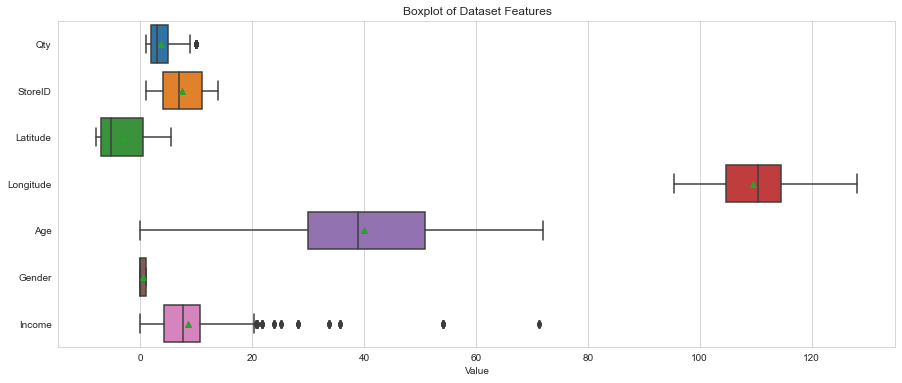

In [769]:
df_col_num = df[['Qty', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

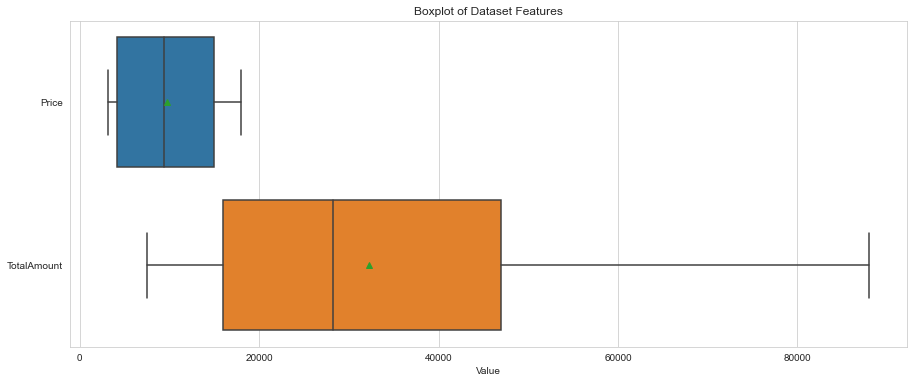

In [770]:
df_col_num = df[['Price', 'TotalAmount']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

In [771]:
import matplotlib.pyplot as plt

def plot_string_columns(dataframe, column_names):
    num_cols = len(column_names)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(14, 8))

    for i, col in enumerate(column_names):
        value_counts = dataframe[col].value_counts()
        labels = value_counts.index
        counts = value_counts.values

        # Menggunakan warna langsung pada fungsi color
        bars = axes[i].bar(labels, counts, color='steelblue')

        axes[i].set_title(f"Distribusi Data pada Kolom {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Counts")

        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width() / 2, height, height,
                         ha='center', va='bottom')

        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.show()


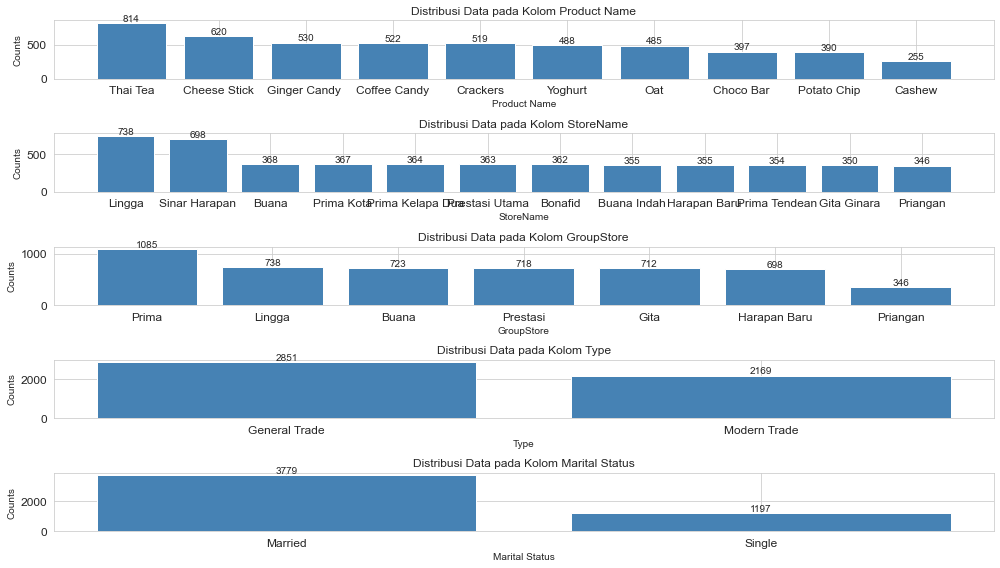

In [772]:
col = ['Product Name', 'StoreName', 'GroupStore', 'Type', 'Marital Status']
plot_string_columns(df, col)

### Checking Multikolinearitas

In [773]:
# MULTIKOLINEARITAS

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
selected_columns = ['Price', 'Qty', 'TotalAmount', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']
df_selected = df[selected_columns]

features_selected = add_constant(df_selected)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = features_selected.columns
vif_data["VIF"] = [variance_inflation_factor(features_selected.values, i) for i in range(len(features_selected.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,Price,6.063522
2,Qty,7.951643
3,TotalAmount,8.637968
4,StoreID,1.304339
5,Latitude,1.533164
6,Longitude,1.202565
7,Age,1.311551
8,Gender,1.005883
9,Income,1.316511


## Final Task - Clustering

### Exploratory Data Analysis (EDA)

In [774]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,Lingga,Lingga,Modern Trade,-3.654703,128.190643,36,0,Married,10.53
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,Lingga,Lingga,Modern Trade,-5.135399,119.423790,36,0,Married,10.53
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53


In [775]:
df['Date'] = pd.to_datetime(df['Date'])
df['CustomerID'] = df['CustomerID'].astype(str)

In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   object        
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Product Name    5020 non-null   object        
 9   StoreName       5020 non-null   object        
 10  GroupStore      5020 non-null   object        
 11  Type            5020 non-null   object        
 12  Latitude        5020 non-null   float64       
 13  Longitude       5020 non-null   float64       
 14  Age             5020 non-null   int64         
 15  Gend

In [777]:
df_grouped = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
})

# Mengganti nama kolom hasil agregasi
df_grouped = df_grouped.rename(columns={
    'TransactionID': 'TransactionCount',
    'Qty': 'TotalQty',
    'TotalAmount': 'TotalAmountSum'
})

df_grouped.head()

,TransactionCount,TotalQty,TotalAmountSum
CustomerID,,,
1,17,60,623300
10,14,50,478000
100,8,35,272400
101,14,44,439600
102,15,57,423300


In [778]:
df_grouped.describe()

,TransactionCount,TotalQty,TotalAmountSum
count,447.000000,447.000000,447.000000
mean,11.230425,40.930649,362512.304251
std,3.245302,12.756679,124634.279184
min,3.000000,10.000000,92100.000000
25%,9.000000,32.000000,271750.000000
50%,11.000000,40.000000,354200.000000
75%,14.000000,50.000000,441200.000000
max,21.000000,79.000000,846700.000000


In [779]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk plotting boxplot
def plot_box(data, labels, title, figsize=(15, 6)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize) 
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)

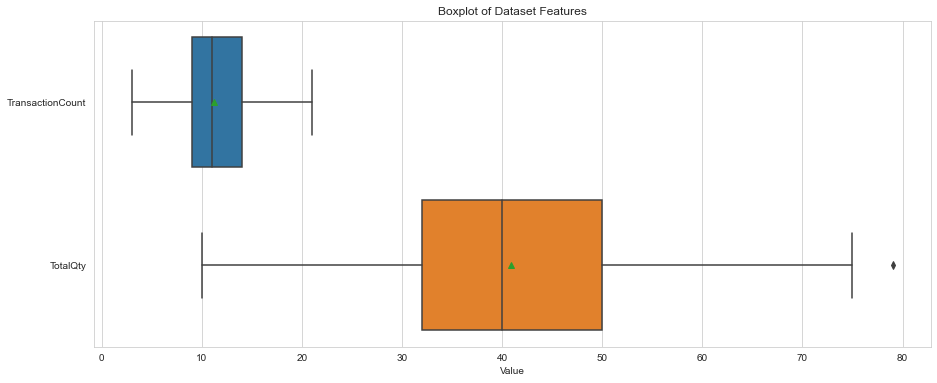

In [782]:
plot_box(data = df_grouped.iloc[:,:2],
         labels = df_grouped.columns.tolist()[:2],
         title='Boxplot of Dataset Features')

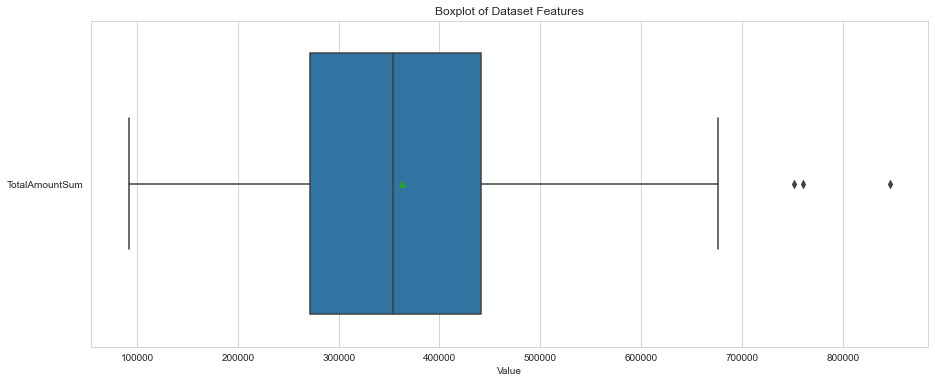

In [783]:
plot_box(data = df_grouped.iloc[:,2:],
         labels = df_grouped.columns.tolist()[2:],
         title='Boxplot of Dataset Features')

In [784]:
import plotly.express as px
fig = px.scatter_matrix(df_grouped, width=1600, height=800)
fig.show()

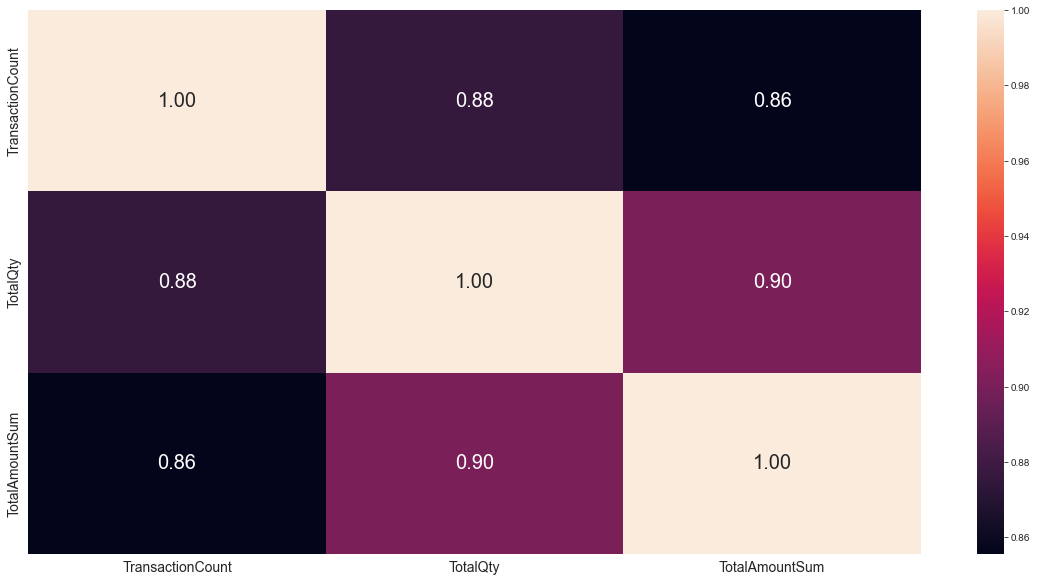

In [785]:
# heatmap correlation
corr = df_grouped.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 20})
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Multikolinearitas

In [786]:
# MULTIKOLINEARITAS

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
selected_columns = df_grouped.columns
df_selected = df_grouped[selected_columns]

features = add_constant(df_selected)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,TransactionCount,4.765002
2,TotalQty,6.789994
3,TotalAmountSum,5.916470


### Feature Engineering

In [787]:
import numpy as np
import pandas as pd

def remove_outliers_dataframe(df, columns, threshold=3):
    df_filtered = df.copy()

    for column in columns:
        data = df[column]
        mean = np.mean(data)
        std = np.std(data)
        z_scores = np.abs((data - mean) / std)
        df_filtered = df_filtered[z_scores < threshold]

    return df_filtered

In [788]:
# Kolom-kolom yang ingin difilter
columns_to_filter = ['TransactionCount', 'TotalQty', 'TotalAmountSum']

# Menghapus outlier dari kolom-kolom yang ditentukan
df_grouped = remove_outliers_dataframe(df_grouped, columns_to_filter)

df_grouped

,TransactionCount,TotalQty,TotalAmountSum
CustomerID,,,
1,17,60,623300
10,14,50,478000
100,8,35,272400
101,14,44,439600
102,15,57,423300
...,...,...,...
95,12,43,410200
96,12,44,355100
97,14,36,329500


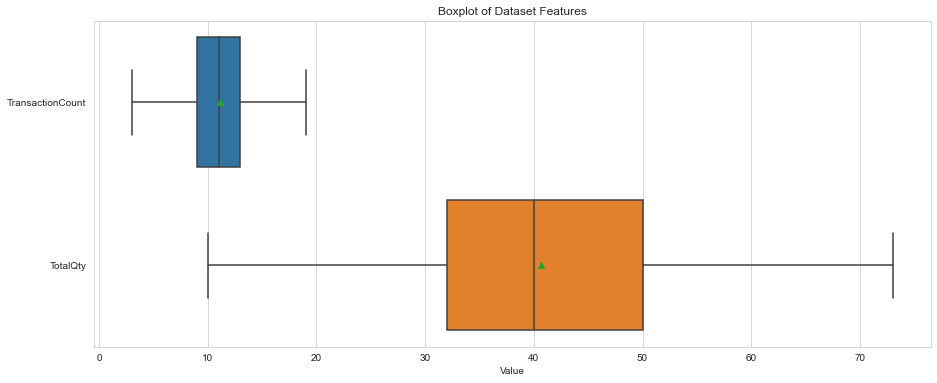

In [789]:
plot_box(data = df_grouped.iloc[:,:2],
         labels = df_grouped.columns.tolist()[:2],
         title='Boxplot of Dataset Features')

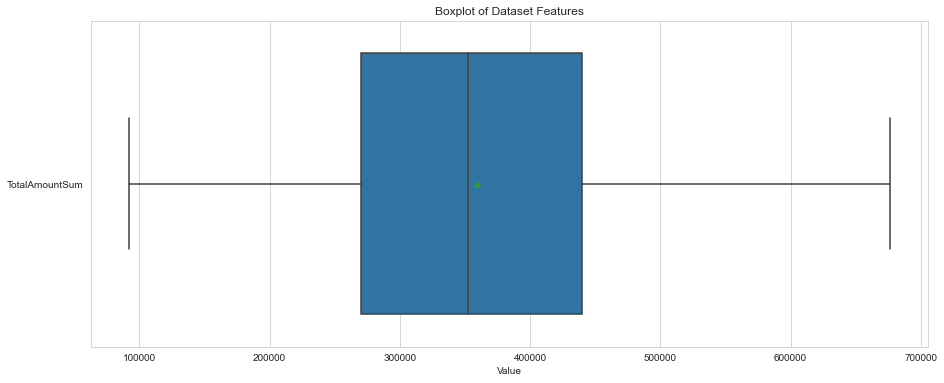

In [790]:
plot_box(data = df_grouped.iloc[:,2:],
         labels = df_grouped.columns.tolist()[2:],
         title='Boxplot of Dataset Features')

In [791]:
from sklearn.preprocessing import MinMaxScaler

X = df_grouped
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

X.tolist()[:5]

[[0.875, 0.7936507936507936, 0.9094333162129773],
 [0.6875, 0.6349206349206349, 0.6606745420304743],
 [0.3125, 0.39682539682539686, 0.30868002054442734],
 [0.6875, 0.5396825396825397, 0.5949323745933915],
 [0.75, 0.7460317460317459, 0.5670261941448382]]

In [792]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Menggunakan metode Elbow untuk menentukan jumlah kluster yang optimal
inertia = []
silhouette = []
davies_bouldin = []
calinski_harabasz = []
k_values = range(2, 15)  # Mencoba jumlah kluster dari 2 hingga 14
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.predict(X)
    silhouette.append(silhouette_score(X, labels))
    davies_bouldin.append(davies_bouldin_score(X, labels))
    calinski_harabasz.append(calinski_harabasz_score(X, labels))

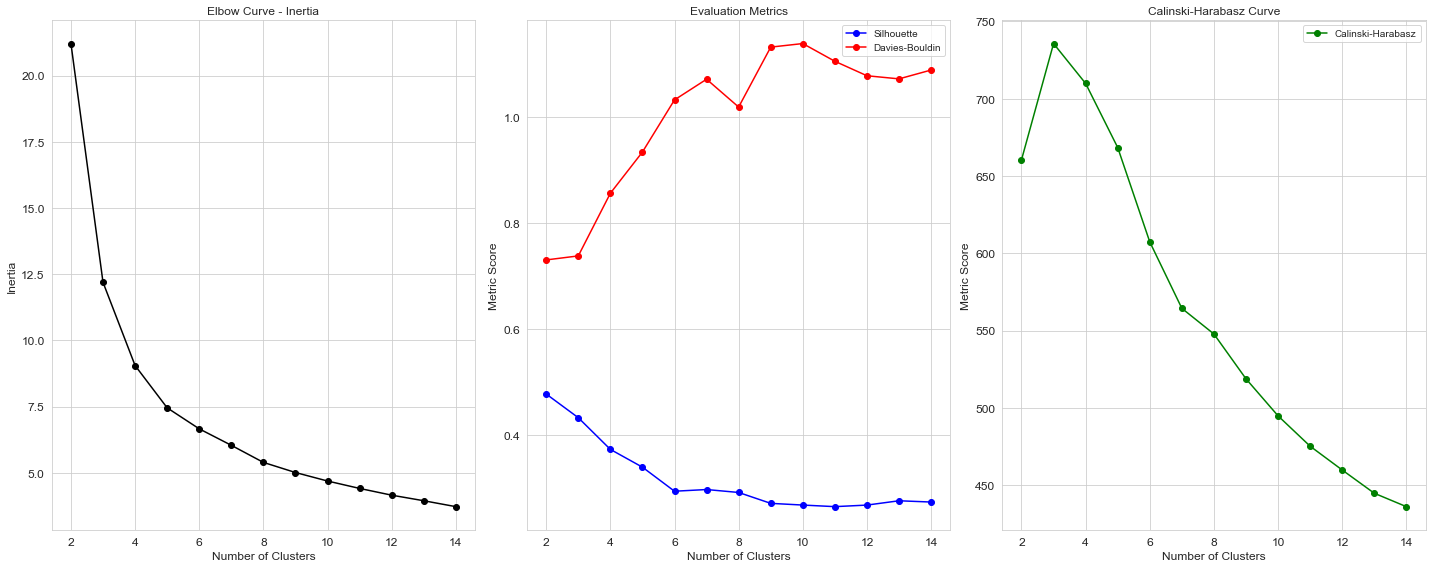

In [794]:
# Plot hasil evaluasi
plt.figure(figsize=(20, 8))

# Subplot 1: Elbow Curve - Inertia
plt.subplot(1, 3, 1)
plt.plot(k_values, inertia, c='black', marker='o')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Curve - Inertia', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Subplot 2: Evaluation Metrics (Silhouette, Davies-Bouldin, Calinski-Harabasz)
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette, 'bo-', label='Silhouette')
plt.plot(k_values, davies_bouldin, 'ro-', label='Davies-Bouldin')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Metric Score', fontsize=12)
plt.title('Evaluation Metrics', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best')

# Subplot 3: Calinski-Harabasz Curve
plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_harabasz, 'go-', label='Calinski-Harabasz')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Metric Score', fontsize=12)
plt.title('Calinski-Harabasz Curve', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [795]:
# Gantilah nilai k terbaik sesuai hasil analisis dari plot yang ditampilkan
n_clust = 3

# Melakukan clustering menggunakan jumlah kluster yang telah ditentukan
kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(X)
labels = kmeans.predict(X)

df_grouped.head()

,TransactionCount,TotalQty,TotalAmountSum
CustomerID,,,
1,17,60,623300
10,14,50,478000
100,8,35,272400
101,14,44,439600
102,15,57,423300


In [828]:
import plotly.graph_objects as go
import numpy as np

centroids = kmeans.cluster_centers_
cluster_colors = ['red', 'blue', 'green']  # Warna untuk setiap kluster

fig = go.Figure()

# Scatter plot for data points in each cluster
for cluster in range(3):
    fig.add_trace(go.Scatter3d(
        x=X[labels == cluster, 0], y=X[labels == cluster, 1], z=X[labels == cluster, 2], mode='markers',
        marker=dict(size=5, color=cluster_colors[cluster]),
        name=f'Cluster {cluster + 1}'
    ))

# Scatter plot for centroids
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2], mode='markers',
    marker=dict(size=10, color='black'),
    name='Centroids'
))

fig.update_layout(
    scene=dict(
        xaxis=dict(title='TransactionCount'),
        yaxis=dict(title='TotalQty'),
        zaxis=dict(title='TotalAmountSum'),
    ),
    title='Scatter Plot dengan Centroid',
    width=800,  
    height=600 
)

fig.show()

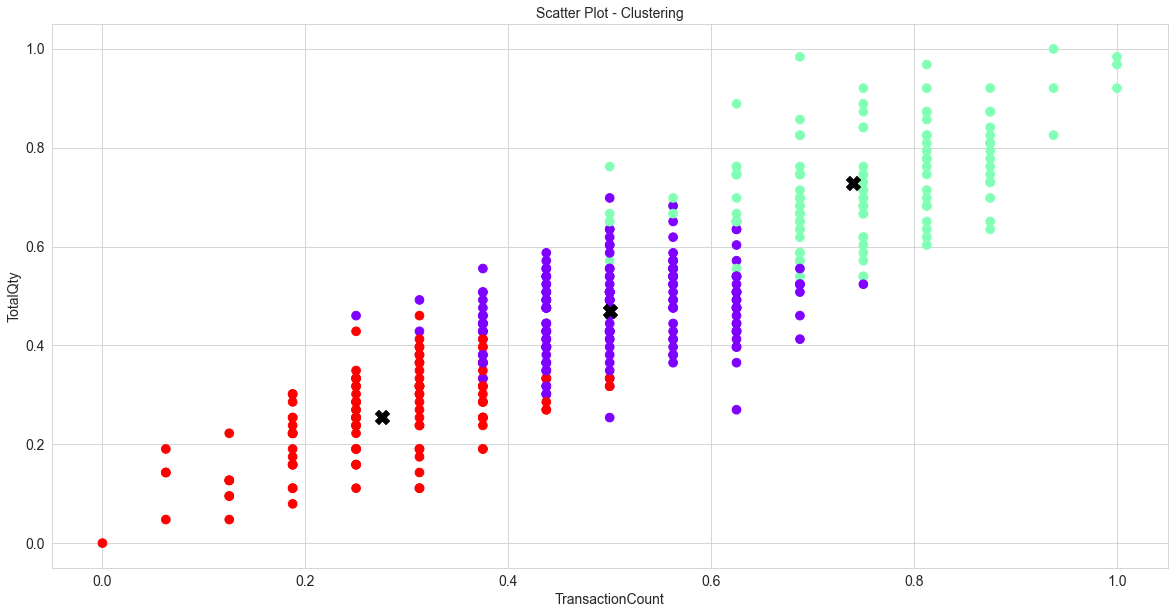

In [797]:
plt.figure(figsize=(20,10))
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow', s = 75)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black', s=200, marker='X')
plt.xlabel("TransactionCount", fontsize=14)
plt.ylabel("TotalQty", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Scatter Plot - Clustering", fontsize=14)
plt.show()

In [829]:
df_result = df_grouped.copy()
df_result['Cluster'] = labels
df_result['Cluster'].value_counts().sort_values(ascending=False)

0    203
1    125
2    115
Name: Cluster, dtype: int64

In [846]:
# clusters.groupby('prediction').mean()
df_result.groupby('Cluster').mean()

,TransactionCount,TotalQty,TotalAmountSum
Cluster,,,
0,11.004926,39.581281,348426.600985
1,14.832000,55.848000,504518.400000
2,7.408696,26.034783,220050.434783


In [842]:
sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)

print("~ ~ ~ Model Metrics Scores ~ ~ ~")
print(f"Silhouette Score\t: {sil_score}")
print(f"Davies-Bouldin Score\t: {db_score}")
print(f"Calinski-Harabasz Score\t: {ch_score}")

~ ~ ~ Model Metrics Scores ~ ~ ~
Silhouette Score	: 0.43339306239644226
Davies-Bouldin Score	: 0.7387372361994299
Calinski-Harabasz Score	: 735.6779809934534
